![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_apple_twitter.ipynb)



# Training a Sentiment Analysis Classifier with NLU 
## 2 class Apple Tweets sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:

<br>

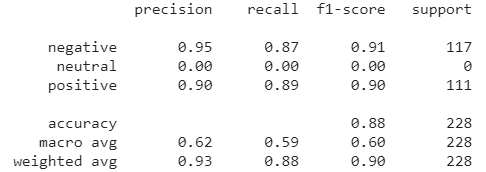

You can achieve these results or even better on this dataset with test data:



<br>


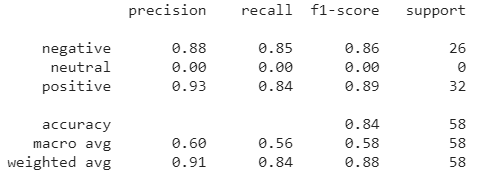



In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2021-05-05 04:02:45--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 04:02:45 (39.1 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 73kB/s 
     |████████████████████████████████| 153kB 46.7MB/s 
     |████████████████████████████████| 204kB 21.9MB/s 
     |████████████████████████████████| 204kB 51.4MB/s 


# 2. Download appple twitter  Sentiment dataset 
https://www.kaggle.com/seriousran/appletwittersentimenttexts

this dataset contains tweets made towards apple and today we are going to train our model to predict whether the tweet contains sentiment!


In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/apple-twitter-sentiment-texts.csv


--2021-05-05 04:04:28--  http://ckl-it.de/wp-content/uploads/2021/01/apple-twitter-sentiment-texts.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31678 (31K) [text/csv]
Saving to: ‘apple-twitter-sentiment-texts.csv’

apple-twitter-senti 100%[===================>]  30.94K  --.-KB/s    in 0.1s    

2021-05-05 04:04:28 (250 KB/s) - ‘apple-twitter-sentiment-texts.csv’ saved [31678/31678]



In [ ]:
import pandas as pd
train_path = '/content/apple-twitter-sentiment-texts.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neuteral"])]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
36,Theyre not RT @Naivana_: You gotta be kidding ...,negative
7,Thank you @Apple for fixing the #Swift sourcek...,positive
272,"Washed my earphones by accident, still works. ...",positive
146,@AppleOfficialll @apple I can't say enough abo...,positive
237,@OneRepublic @Apple So amazing,positive
...,...,...
247,Got to hear about the new patent by apple ... ...,positive
157,fuck you @apple,negative
93,#apple earns more #profit in on quarter than #...,positive
165,This is why I moved over to @Apple... http://t...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
from sklearn.metrics import classification_report
import nlu 
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00      23.0
     neutral       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00      27.0

    accuracy                           0.00      50.0
   macro avg       0.00      0.00      0.00      50.0
weighted avg       0.00      0.00      0.00      50.0



,text,sentence_embedding_use,sentence,y,origin_index,document,trained_sentiment,trained_sentiment_confidence
0,Theyre not RT @Naivana_: You gotta be kidding ...,"[0.053627125918865204, 0.03388773649930954, 0....","[Theyre not RT @Naivana_:, You gotta be kiddi...",negative,36,Theyre not RT @Naivana_: You gotta be kidding ...,neutral,0.519284
1,Thank you @Apple for fixing the #Swift sourcek...,"[0.01400269940495491, 0.04662228375673294, 0.0...",[Thank you @Apple for fixing the #Swift source...,positive,7,Thank you @Apple for fixing the #Swift sourcek...,neutral,0.526175
2,"Washed my earphones by accident, still works. ...","[0.028794147074222565, 0.060343481600284576, -...","[Washed my earphones by accident, still works....",positive,272,"Washed my earphones by accident, still works. ...",neutral,0.546108
3,@AppleOfficialll @apple I can't say enough abo...,"[0.04390808567404747, 0.0024722537491470575, -...",[@AppleOfficialll @apple I can't say enough ab...,positive,146,@AppleOfficialll @apple I can't say enough abo...,neutral,0.535401
4,@OneRepublic @Apple So amazing,"[-0.0420607253909111, 0.05555792152881622, -0....",[@OneRepublic @Apple So amazing],positive,237,@OneRepublic @Apple So amazing,neutral,0.562668
5,The 10 biggest differences between #Mac and #P...,"[0.046186886727809906, 0.0493854284286499, 0.0...",[The 10 biggest differences between #Mac and #...,positive,213,The 10 biggest differences between #Mac and #P...,neutral,0.541398
6,@SamJam Agreed--have to give props to @Apple f...,"[0.06067856401205063, -0.014465369284152985, -...",[@SamJam Agreed--have to give props to @Apple ...,positive,77,@SamJam Agreed--have to give props to @Apple f...,neutral,0.553645
7,"@OneRepublic @Apple that looks amazing, don't ...","[0.016945000737905502, -0.019095521420240402, ...","[@OneRepublic @Apple that looks amazing, don't...",positive,56,"@OneRepublic @Apple that looks amazing, don't ...",neutral,0.548541
8,Finally! Brooklyn Is Getting Its Own #Apple St...,"[0.06617175042629242, -0.018538057804107666, -...","[Finally!, Brooklyn Is Getting Its Own #Apple...",positive,234,Finally! Brooklyn Is Getting Its Own #Apple St...,neutral,0.531661
9,RT @ehsonakbary: THE WORLD'S FIRST MURDER VIA ...,"[0.07017797976732254, 0.03393903002142906, -0....",[RT @ehsonakbary: THE WORLD'S FIRST MURDER VIA...,negative,103,RT @ehsonakbary: THE WORLD'S FIRST MURDER VIA ...,neutral,0.541381


#4.  Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('I hate the newest update')

,sentence_embedding_use,sentence,origin_index,document,trained_sentiment,trained_sentiment_confidence
0,"[-0.023322951048612595, -0.04157407209277153, ...",[I hate the newest update],0,I hate the newest update,neutral,0.509875


##5.  Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(1)                 | Info: Maximum number of epochs to train | Currently set to : 1
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

##6.  Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlu.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:100])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:100],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.94      0.94      0.94        47
     neutral       0.00      0.00      0.00         0
    positive       0.98      0.91      0.94        53

    accuracy                           0.92       100
   macro avg       0.64      0.61      0.63       100
weighted avg       0.96      0.92      0.94       100



,text,sentence_embedding_use,sentence,y,origin_index,document,trained_sentiment,trained_sentiment_confidence
0,Theyre not RT @Naivana_: You gotta be kidding ...,"[0.053627125918865204, 0.03388773649930954, 0....","[Theyre not RT @Naivana_:, You gotta be kiddi...",negative,36,Theyre not RT @Naivana_: You gotta be kidding ...,negative,0.947914
1,Thank you @Apple for fixing the #Swift sourcek...,"[0.01400269940495491, 0.04662228375673294, 0.0...",[Thank you @Apple for fixing the #Swift source...,positive,7,Thank you @Apple for fixing the #Swift sourcek...,positive,0.926184
2,"Washed my earphones by accident, still works. ...","[0.028794147074222565, 0.060343481600284576, -...","[Washed my earphones by accident, still works....",positive,272,"Washed my earphones by accident, still works. ...",positive,0.867718
3,@AppleOfficialll @apple I can't say enough abo...,"[0.04390808567404747, 0.0024722537491470575, -...",[@AppleOfficialll @apple I can't say enough ab...,positive,146,@AppleOfficialll @apple I can't say enough abo...,negative,0.707370
4,@OneRepublic @Apple So amazing,"[-0.0420607253909111, 0.05555792152881622, -0....",[@OneRepublic @Apple So amazing],positive,237,@OneRepublic @Apple So amazing,positive,0.989958
...,...,...,...,...,...,...,...,...
95,Apple Inc. CEO Donates $291K To Pennsylvania S...,"[0.036090489476919174, 0.033749453723430634, -...",[Apple Inc. CEO Donates $291K To Pennsylvania ...,positive,4,Apple Inc. CEO Donates $291K To Pennsylvania S...,neutral,0.598268
96,Photo: Yaaass. Shoutout to @apple.holidays and...,"[0.062088269740343094, -0.0338711179792881, -0...","[Photo:, Yaaass., Shoutout to @apple., holiday...",positive,275,Photo: Yaaass. Shoutout to @apple.holidays and...,positive,0.998650
97,RT @hypebot: Steve Job's Deposition in #iPod L...,"[0.06204485893249512, 0.05829763785004616, -0....",[RT @hypebot: Steve Job's Deposition in #iPod ...,negative,141,RT @hypebot: Steve Job's Deposition in #iPod L...,neutral,0.581826
98,@apple I have been on hold for 30 minutes than...,"[0.02501610852777958, 0.04794774204492569, -0....",[@apple I have been on hold for 30 minutes tha...,negative,128,@apple I have been on hold for 30 minutes than...,negative,0.933449


#7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(110)  
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.97      0.83      0.90       114
     neutral       0.00      0.00      0.00         0
    positive       0.88      0.93      0.90       114

    accuracy                           0.88       228
   macro avg       0.62      0.59      0.60       228
weighted avg       0.92      0.88      0.90       228



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.94      0.59      0.72        29
     neutral       0.00      0.00      0.00         0
    positive       0.79      0.93      0.86        29

    accuracy                           0.76        58
   macro avg       0.58      0.51      0.53        58
weighted avg       0.87      0.76      0.79        58



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('I hate the newest update')
preds

,text,sentiment,sentence,origin_index,document,sentence_embedding_from_disk,sentiment_confidence
0,I hate the newest update,[negative],[I hate the newest update],8589934592,I hate the newest update,"[[-0.3084237277507782, -0.11030610650777817, 0...",[0.67131346]


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.anno